# SVR
### Команда:
* [Ирина Цехановаич](https://www.instagram.com/ms_cehanovich/)
* [Никита Антонов](https://www.instagram.com/nickantonovv/)
* [Алексей Полоз](https://www.instagram.com/mr.poloz/)

In [150]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

## Импортируем данные

In [151]:
df = pd.read_csv('2014/1-Jan14.csv')
df.head()

,LinkRef,LinkDescription,Date,TimePeriod,AverageJT,AverageSpeed,DataQuality,LinkLength,Flow
0,AL1470,A168 between A170 and A167 (AL1470),2014-01-18 00:00:00,83,240.74,101.69,2,6.8,59.25
1,AL1470,A168 between A170 and A167 (AL1470),2014-01-18 00:00:00,84,238.10,102.81,2,6.8,37.50
2,AL1470,A168 between A170 and A167 (AL1470),2014-01-18 00:00:00,85,266.02,92.02,2,6.8,37.50
3,AL1470,A168 between A170 and A167 (AL1470),2014-01-18 00:00:00,86,252.82,96.83,2,6.8,37.50
4,AL1470,A168 between A170 and A167 (AL1470),2014-01-18 00:00:00,87,234.70,104.30,2,6.8,37.50


## Подготавливаем данные

In [152]:
df = df[df['LinkRef'] == 'AL1470']

In [167]:
import time

to_stamp = lambda t: int(time.mktime(time.strptime(t, '%Y-%m-%d %H:%M:%S')))
df['Time'] = df['Date'].map(to_stamp)

to_day_of_week = lambda t: t // 86400 % 7
df['Day'] = df['Time'].map(to_day_of_week)

In [156]:
trX = df[['TimePeriod', 'AverageSpeed']] # , 'Day'
trY = df.Flow

## Обучение

In [157]:
model = SVR(C=1.0, epsilon=0.2)
model.fit(trX, trY)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Прогнозируем

In [158]:
df_test = pd.read_csv('2014/2-Feb14.csv')
df_test = df_test[df_test['LinkRef'] == 'AL1470']

In [159]:
to_stamp = lambda t: int(time.mktime(time.strptime(t, '%Y-%m-%d %H:%M:%S')))
df_test['Time'] = df_test['Date'].map(to_stamp)

to_day_of_week = lambda t: t // 86400 % 7
df_test['Day'] = df_test['Time'].map(to_day_of_week)

In [160]:
teX = df_test[['TimePeriod', 'AverageSpeed']] # , 'Day'
teY = df_test.Flow

In [161]:
trainPredict = model.predict(trX)

In [162]:
testPredict = model.predict(teX)
print(predict)

[-0.74737941  8.92612188  1.89420911 ... 25.37119805 20.12364362
 52.2617616 ]


## Метрики
### RMSE (Среднеквадратичное отклонение)

In [163]:
trainScore = math.sqrt(mean_squared_error(trY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(teY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 69.30 RMSE
Test Score: 71.23 RMSE


### MSA (Среднее абсолютное отклонение)

In [164]:
trainScore = mean_absolute_error(trY, trainPredict)
print('Train Score: %.2f MSA' % (trainScore))
testScore = mean_absolute_error(teY, testPredict)
print('Test Score: %.2f MSA' % (testScore))

Train Score: 50.24 MSA
Test Score: 52.80 MSA


### R<sup>2</sup>

In [165]:
trainScore = r2_score(trY, trainPredict)
print('Train Score: %.2f R2' % (trainScore))
testScore = r2_score(teY, testPredict)
print('Test Score: %.2f R2' % (testScore))

Train Score: 0.68 R2
Test Score: 0.66 R2


## Строим график

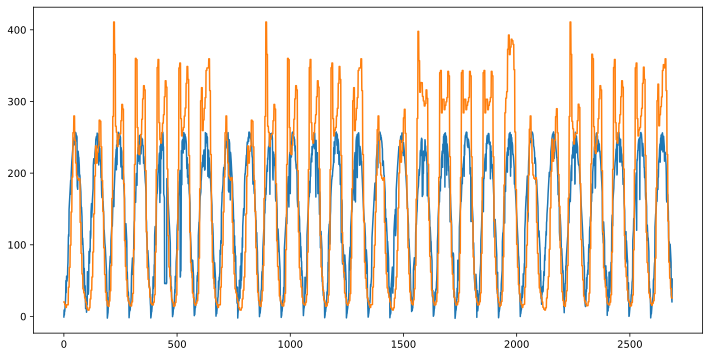

In [166]:
plt.plot(list(range(len(predict))), predict)

Y = list(teY.values)
plt.plot(list(range(len(Y))), Y)

plt.show()